In dog vs. cat image classification using neural networks, we train a model to distinguish between these two categories by analyzing pixel data from images. Each image, represented as a matrix of pixel values (in grayscale or RGB), is fed into the network’s input layer. Through hidden layers, the model learns to recognize distinguishing features—like fur patterns, ear shapes, and facial structures—using activation functions like ReLU. In the output layer, the network assigns probabilities to each category, determining whether the image is more likely a dog or a cat. Convolutional neural networks (CNNs) make this approach highly effective, supporting applications in pet recognition systems and automated sorting in image libraries.

Import the libraries

In [6]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

Connecting to google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating a folder

In [ ]:
!mkdir /content/my_new_folder1

Accessing the zip file

In [8]:
path='/content/my_new_folder/cat_dog_1.zip'
zip_object=zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

In [9]:
directory_train='/content/cat_dog_1/train'
directory_test='/content/cat_dog_1/test'
files_train=[os.path.join(directory_train,f) for f in sorted(os.listdir(directory_train))]
files_test=[os.path.join(directory_test,f) for f in sorted(os.listdir(directory_test))]

In [10]:
height,width=128,128

### Train

In [ ]:
images=[]
classes=[]
for image_path in files_train:
  try:
    image=cv2.imread(image_path)
    (H,W)=image.shape[:2]
  except:
    continue
  image=cv2.resize(image,(width,height))#resizing the image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#converting th grayscale image
  cv2_imshow(image)
  image=image.ravel()#converting matrix into vector


  print(image.shape)
  images.append(image)
  #To identify whether the image is of homer or bart
  image_name=os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    class_name=0
  else:
    class_name=1
  classes.append(class_name)
  print(class_name)


In [12]:
X_train=np.asarray(images)
y_train=np.asarray(classes)

In [13]:
X_train.shape

(4000, 16384)

In [14]:
y_train.shape

(4000,)

### Test

In [ ]:
images=[]
classes=[]
for image_path in files_test:
  try:
    image=cv2.imread(image_path)
    (H,W)=image.shape[:2]
  except:
    continue
  image=cv2.resize(image,(width,height))#resizing the image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)#converting th grayscale image
  cv2_imshow(image)
  image=image.ravel()#converting matrix into vector


  print(image.shape)
  images.append(image)
  #To identify whether the image is of homer or bart
  image_name=os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('c'):
    class_name=0
  else:
    class_name=1
  classes.append(class_name)
  print(class_name)


In [16]:
X_test=np.asarray(images)
y_test=np.asarray(classes)

In [17]:
X_test.shape,y_test.shape

((1000, 16384), (1000,))

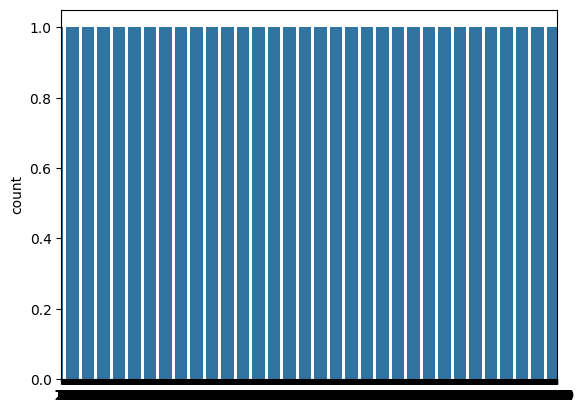

In [18]:
sns.countplot(y_train);

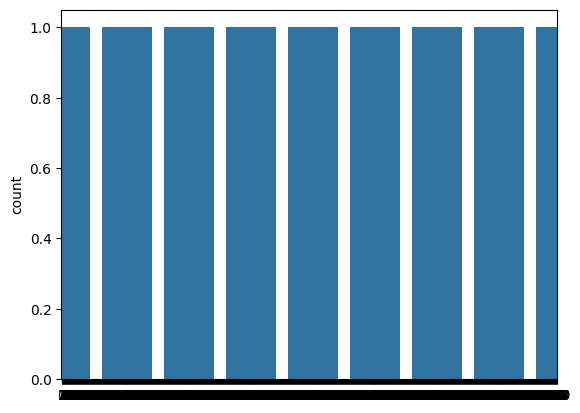

In [19]:
sns.countplot(y_test);

### Normalizing the data

In [20]:
X_train[0].max(),X_train[0].min()

(236, 1)

In [21]:


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
X_train[0].max(),X_train[0].min()

(0.9254901960784314, 0.0)

In [23]:
X_test[0].max(),X_test[0].min()

(1.0, -0.003937007874015748)

### Building and training the neural network

In [24]:
(16384+2)/2

8193.0

In [25]:
#16384->8193->8193->1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(units=8193, activation='relu', input_shape=(16384,))) # Hidden layer 1
network1.add(tf.keras.layers.Dense(units=8193, activation='relu')) # Hidden layer 2
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
network1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
network1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:

history=network1.fit(X_train,y_train,epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.4927 - loss: 26.3598
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 496s 4s/step - accuracy: 0.5411 - loss: 0.6866
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - accuracy: 0.5228 - loss: 0.6970
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 514s 4s/step - accuracy: 0.5764 - loss: 0.6799
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 492s 4s/step - accuracy: 0.5708 - loss: 0.6883
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 453s 4s/step - accuracy: 0.5365 - loss: 0.6905
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - accuracy: 0.5442 - loss: 0.6845
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.5214 - loss: 0.6870
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.5420 - loss: 0.6852
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.5643 - loss: 0.6750


### Evaluating the neural network

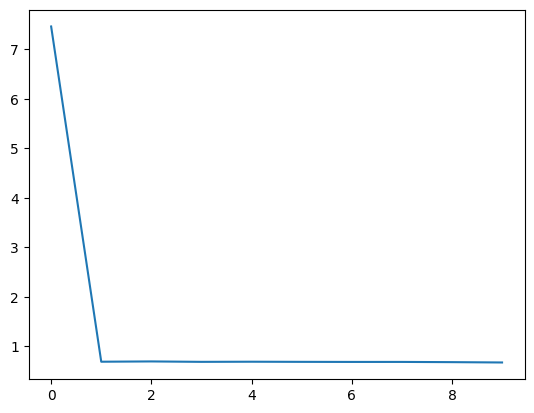

In [29]:
plt.plot(history.history['loss']);

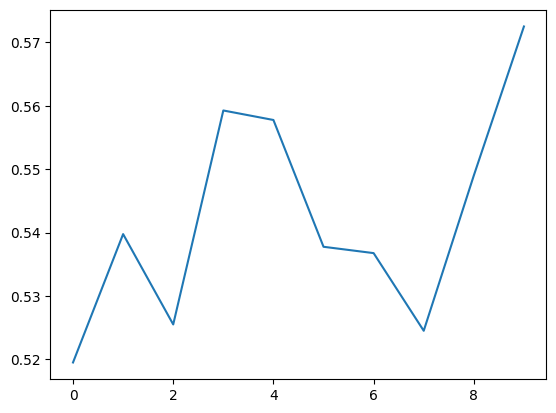

In [30]:
plt.plot(history.history['accuracy']);

In [31]:
X_test.shape

(1000, 16384)

In [32]:
predictions=network1.predict(X_test)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step


array([[0.55268884],
       [0.48044696],
       [0.55268884],
       [0.55268884],
       [0.53939706],
       [0.5443131 ],
       [0.55268884],
       [0.55268884],
       [0.45477578],
       [0.55268884],
       [0.33947015],
       [0.45937404],
       [0.4524724 ],
       [0.55268884],
       [0.3691143 ],
       [0.35800597],
       [0.4162313 ],
       [0.55268884],
       [0.55268884],
       [0.43894893],
       [0.43069264],
       [0.41229162],
       [0.43355432],
       [0.55268884],
       [0.34234414],
       [0.55268884],
       [0.44347805],
       [0.55268884],
       [0.55268884],
       [0.3826621 ],
       [0.55268884],
       [0.55268884],
       [0.55268884],
       [0.19584924],
       [0.55268884],
       [0.46175805],
       [0.45746753],
       [0.53484255],
       [0.32228675],
       [0.30357563],
       [0.38212025],
       [0.42092675],
       [0.40578732],
       [0.55268884],
       [0.20680916],
       [0.42152363],
       [0.50527453],
       [0.273

In [33]:
predictions=(predictions>0.5)
predictions

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [34]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)


0.563

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[188, 312],
       [125, 375]])

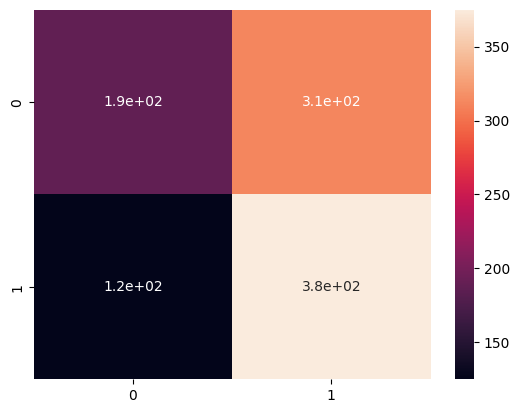

In [37]:
sns.heatmap(cm,annot=True);


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46       500
           1       0.55      0.75      0.63       500

    accuracy                           0.56      1000
   macro avg       0.57      0.56      0.55      1000
weighted avg       0.57      0.56      0.55      1000



The model achieved an accuracy of 56%, performing better on Class 1 (f1-score: 0.63) than Class 0 (f1-score: 0.46). Precision and recall were moderate, with overall averages around 0.55, indicating balanced but limited classification effectiveness.